pip install numpy

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\users\artur\pycharmprojects\pythonproject\c964\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3543,ham,Lol ok ill try to send. Be warned Sprint is de...,NaN,NaN,NaN
2283,ham,I reach home safe n sound liao...,NaN,NaN,NaN
4226,ham,Buy one egg for me da..please:),NaN,NaN,NaN
3702,ham,How is my boy? No sweet words left for me this...,NaN,NaN,NaN
1589,ham,I love you. You set my soul on fire. It is not...,NaN,NaN,NaN


In [ ]:
df.info()

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\users\artur\pycharmprojects\pythonproject\c964\scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
from  sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
df.rename(columns={'v1':'Category','v2':'Message'}, inplace = True)
df.sample(5)

,Category,Message
4182,ham,"Sorry, I'll call later in meeting"
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"
2288,ham,Dont you have message offer
5121,ham,"Oops I did have it, &lt;#&gt; ?"
3235,ham,Aight text me when you're back at mu and I'll ...


In [20]:
data = df.where((pd.notnull(df)), '')

In [21]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [27]:
data.loc[data['Category']=='spam','Category']=0
data.loc[data['Category']=='ham','Category']=1

In [28]:
X = data['Message']
Y = data['Category']
print(X,Y)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object 0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 3)

In [30]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [31]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [32]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test= Y_test.astype('int')


In [33]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [36]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [37]:
print('acc on training data : ', accuracy_on_training_data )

acc on training data :  0.9661207089970832


In [38]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [42]:
print('acc on test data : ', accuracy_on_test_data )

acc on test data :  0.9623318385650225


In [49]:
input_your_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)

[0]


In [44]:
print(data['Category'].value_counts())

Category
1    4825
0     747
Name: count, dtype: int64


In [31]:
pip install matplotlib 


You should consider upgrading via the 'd:\users\artur\pycharmprojects\pythonproject\c964\scripts\python.exe -m pip install --upgrade pip' command.


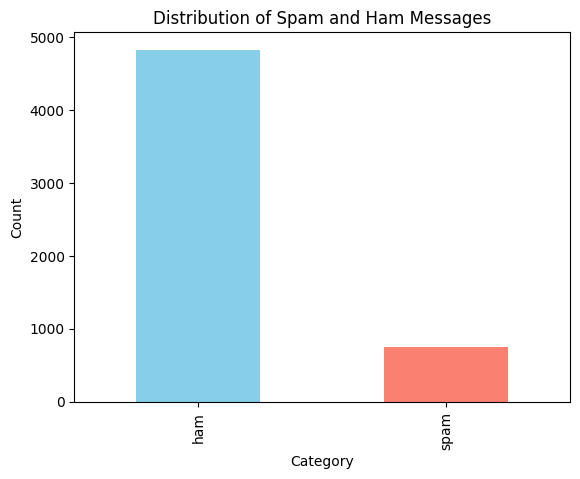

In [32]:
import matplotlib.pyplot as plt

# Distribution of categories
df['Category'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [35]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\users\artur\pycharmprojects\pythonproject\c964\scripts\python.exe -m pip install --upgrade pip' command.


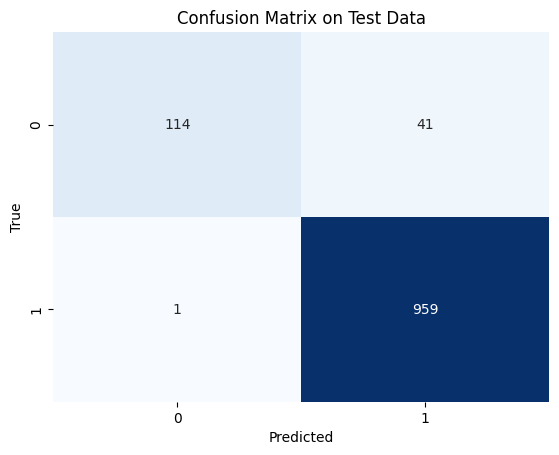

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


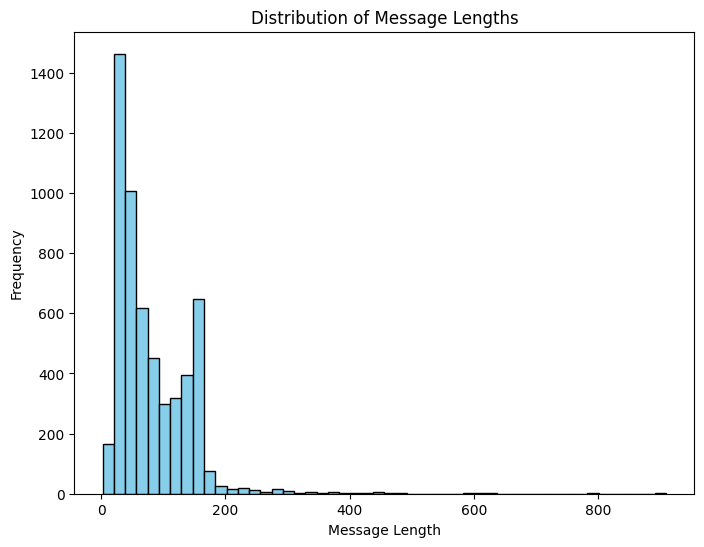

In [41]:
# Calculate the length of each message
df['Message_Length'] = df['Message'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(8, 6))
plt.hist(df['Message_Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()